In [1]:
import argparse
import scanpy as sc
import plotnine as plt9
import pandas as pd
import numpy as np
import matplotlib as plt
import os
%load_ext autoreload
%autoreload 2
import anndata
import seaborn as sns
import logging
import scipy.stats
import re

In [2]:
import scvelo as scv
import velocyto as vcy

In [3]:
#fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/analysis/adata_velocity/vadata_scVelo_Myeloid.h5ad"
#adata_mye=sc.read(fpath) 

In [4]:
fpath="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/data/gut-freeze003/ti-cd_healthy/analysis/velocity/adata/vadata_scVelo_gut-freeze003_epi_5k.h5ad"
#fpath="/home/ubuntu/ubuntu/data/scibd/gut-freeze003/analysis/003-velocity/vadata_scVelo_gut-freeze003_entero_stem_5k.h5ad"
adata_epi=sc.read(fpath) 

In [6]:
file1="/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/manuscript/ti_atlas_code/figures/data/palette.tsv"
pal=pd.read_table(file1, sep="\t")

pal1=pal[pal.category.isin(["Secretory", "Stem cells", "Enterocyte"])]
pal1=pal1[["label", "palette_label"]]
pal1

,label,palette_label
9,Enterocyte middle villus (1),#1f77b4
10,Enterocyte middle villus (2),#ff7f0e
11,Enterocyte precursor crypt OLFM4+ KRT20++,#279e68
12,Enterocyte progenitor crypt OLFM4++ KRT20+ (1),#d62728
13,Enterocyte progenitor crypt OLFM4++ KRT20+ (2),#aa40fc
14,Enterocyte top villus,#8c564b
15,Enterocytes BEST4,#e377c2
27,Endocrine cell,#1f77b4
28,Goblet cell crypt MKI67+,#ff7f0e
29,Goblet cell middle villus,#279e68


In [7]:
out = {}                                                               
for j in pal1["label"].tolist(): 
    out[j] = pal1[pal1["label"]==j]["palette_label"].tolist()

In [8]:
#out=pal1.set_index('label').T.to_dict('int')

In [9]:
out={'Enterocyte middle villus (1)': '#1f77b4',
 'Enterocyte middle villus (2)': '#ff7f0e',
 'Enterocyte precursor crypt OLFM4+ KRT20++': '#279e68',
 'Enterocyte progenitor crypt OLFM4++ KRT20+ (1)': '#d62728',
 'Enterocyte progenitor crypt OLFM4++ KRT20+ (2)': '#aa40fc',
 'Enterocyte top villus': '#8c564b',
 'Enterocytes BEST4': '#e377c2',
 'Endocrine cell': '#1f77b4',
 'Goblet cell crypt MKI67+': '#ff7f0e',
 'Goblet cell middle villus': '#279e68',
 'Goblet cell top villus': '#d62728',
 'Paneth cell': '#aa40fc',
 'Tuft cell': '#8c564b',
 'Stem cell LGR5+': '#1f77b4',
 'Stem cell MKI67+ (1)': '#ff7f0e',
 'Stem cell MKI67+ (2)': '#279e68'}

In [14]:
#palet2={'Enterocyte middle villus (1)': '#1f77b4',
#  'Enterocyte middle villus (2)': '#ff7f0e',
#  'Enterocyte precursor crypt OLFM4+ KRT20++': '#279e68',
#  'Enterocyte progenitor crypt OLFM4++ KRT20+ (1)': '#d62728',
#  'Enterocyte progenitor crypt OLFM4++ KRT20+ (2)': '#aa40fc',
#  'Enterocyte top villus': '#8c564b',
#  'Enterocytes BEST4': '#e377c2',
# 'Endocrine cell': '#1f77b4',
#  'Goblet cell crypt MKI67+': '#ff7f0e',
#  'Goblet cell middle villus': '#279e68',
#  'Goblet cell top villus': '#d62728',
#  'Paneth cell': '#aa40fc',
# 'Stem cell LGR5+': '#1f77b4',
#  'Stem cell MKI67+ (1)': '#ff7f0e',
#  'Stem cell MKI67+ (2)': '#279e68'}

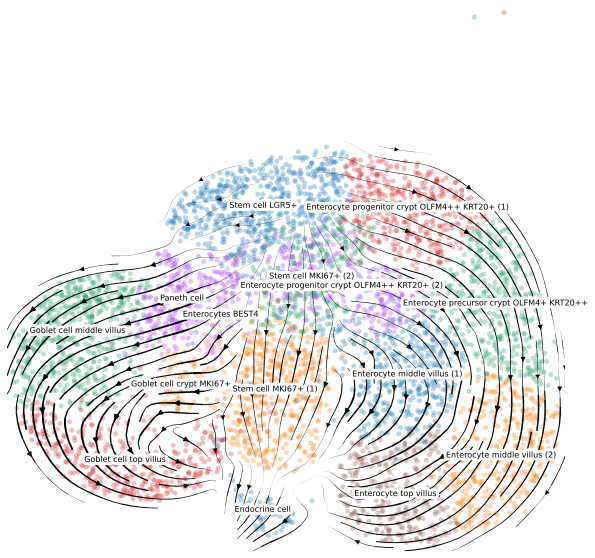

In [11]:
ax2 = scv.pl.velocity_embedding_stream(adata_epi, basis='umap',
                                 title="Epithelial",
                                 color='cell_type', 
                                 legend_loc='on data',
                                 #legend_align_text="xy",
                                 legend_fontoutline=6,
                                 figsize=(10,10),
                                 palette=out,
                                 legend_fontsize=8,
                                 size=100,
                                 color_map=None,
                                 #alpha=0,
                                 frameon=False,
                                 legend_fontweight='normal',
                                #save='velocity_epithelial.png',
                                show=False)
ax2.set_title("")
#ax.set_label(font=ff)

import matplotlib.pyplot as pl
fig2 = ax2.figure 
fig2.savefig('/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/velocity.png', dpi=300)

In [15]:
palette=['#1f77b4',
'#ff7f0e',
'#279e68',
'#d62728',
'#aa40fc',
'#8c564b',
'#e377c2',
'#b5bd61',
'#17becf',
'#aec7e8',
'#ffbb78',
'#98df8a',
'#ff9896',
'#c5b0d5',
'#c49c94',
'#f7b6d2',
'#dbdb8d',
'#9edae5',
'#ad494a',
'#8c6d31']


In [16]:
#col1=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Myeloid'].obs.cell_type))]
#col1=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Myeloid'].obs.cell_type), col1))
#col1

In [25]:
#col1=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Enterocyte'].obs.cell_type))]
#col1=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Enterocyte'].obs.cell_type), col1))

#col2=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Secretory'].obs.cell_type))]
#col2=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Secretory'].obs.cell_type), col2))


#col3=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Stem cells'].obs.cell_type))]
#col3=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Stem cells'].obs.cell_type), col3))

#palet=[col1, col2, col3]


In [26]:
palet1 = {'Dendritic cell': '#1f77b4',
 'Mac resident IL10RA+': '#ff7f0e',
 'Mac resident IL10RA-': '#279e68',
 'MoMac IL10RA+': '#d62728',
 'MoMac IL10RA-': '#aa40fc',
 'Monocytes': '#8c564b'}

palet2={'Enterocyte middle villus (1)': '#1f77b4',
  'Enterocyte middle villus (2)': '#ff7f0e',
  'Enterocyte precursor crypt OLFM4+ KRT20++': '#279e68',
  'Enterocyte progenitor crypt OLFM4++ KRT20+ (1)': '#d62728',
  'Enterocyte progenitor crypt OLFM4++ KRT20+ (2)': '#aa40fc',
  'Enterocyte top villus': '#8c564b',
  'Enterocytes BEST4': '#e377c2',
 'Endocrine cell': '#1f77b4',
  'Goblet cell crypt MKI67+': '#ff7f0e',
  'Goblet cell middle villus': '#279e68',
  'Goblet cell top villus': '#d62728',
  'Paneth cell': '#aa40fc',
 'Stem cell LGR5+': '#1f77b4',
  'Stem cell MKI67+ (1)': '#ff7f0e',
  'Stem cell MKI67+ (2)': '#279e68'}

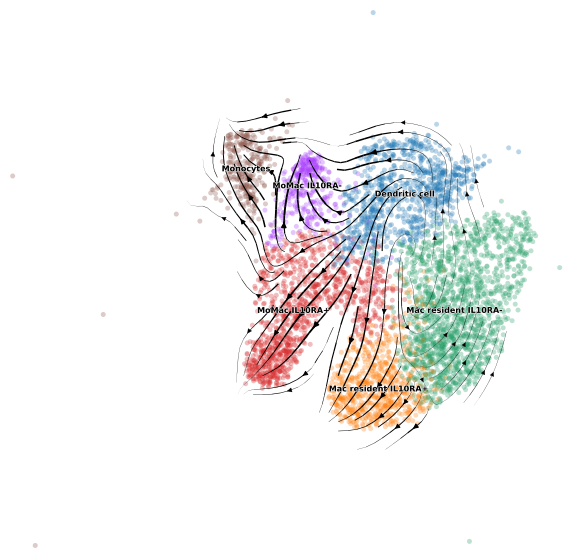

In [41]:
ax = scv.pl.velocity_embedding_stream(adata_mye, basis='umap',
                                 title="Myeloid",
                                 color='cell_type', 
                                 legend_loc='on data',
                                 figsize=(10,10),
                                 palette=palet1,
                                 legend_fontsize=8,
                                 size=100,
                                 color_map=None,
                                 #alpha=0,
                                 frameon=False,
                                 legend_fontweight='semibold',
                                  #save='velocity_myeloid.png',
                                #save='Epithelial.png',
                                show=False)
ax.set_title("")
#ax.set_label(font=ff)

import matplotlib.pyplot as pl
fig1 = ax.figure 
fig1.savefig('/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/velocity_myeloid.png')

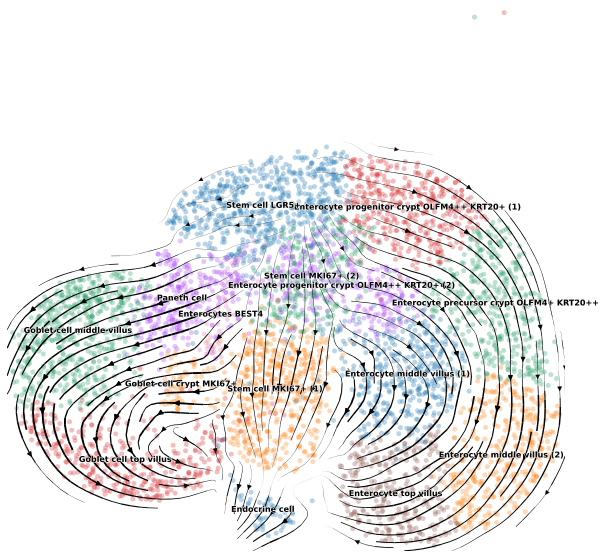

In [42]:
ax2 = scv.pl.velocity_embedding_stream(adata_epi, basis='umap',
                                 title="Epithelial",
                                 color='cell_type', 
                                 legend_loc='on data',
                                 figsize=(10,10),
                                 palette=palet2,
                                 legend_fontsize=8,
                                 size=100,
                                 color_map=None,
                                 #alpha=0,
                                 frameon=False,
                                 legend_fontweight='semibold',
                                #save='velocity_epithelial.png',
                                show=False)
ax2.set_title("")
#ax.set_label(font=ff)

import matplotlib.pyplot as pl
fig2 = ax2.figure 
fig2.savefig('/home/ubuntu/ubuntu/sc_ibd_project/ti_atlas/figures-ti_cd_singlecell/figures/00055-study_overview/velocity_epithelial.png')

computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
saving figure to file ./figures/scvelo_pseudotime.png


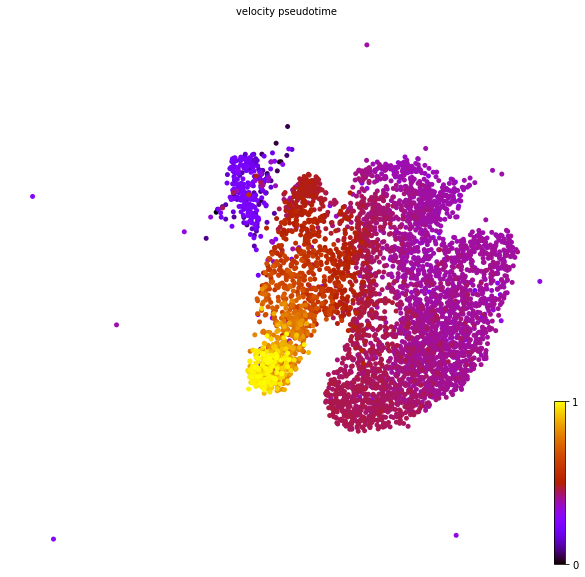

In [49]:
scv.tl.velocity_pseudotime(adata)
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot',
                                 figsize=(10,10),
                                 palette=palet,
                                 legend_fontsize=8,
                                 size=100,                       
                                 save='pseudotime.png')

saving figure to file ./figures/scvelo_root.png


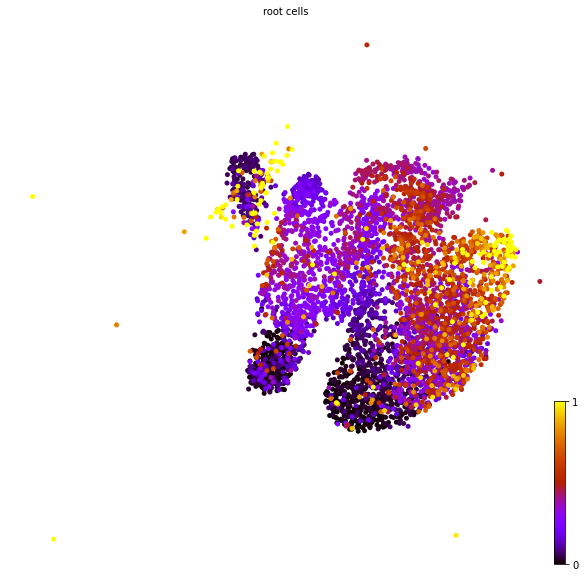

In [50]:
scv.pl.scatter(adata, color='root_cells', cmap='gnuplot',
                                 figsize=(10,10),
                                 palette=palet,
                                 legend_fontsize=8,
                                 size=100,                       
                                 save='root.png')

saving figure to file ./figures/scvelo_end_points.png


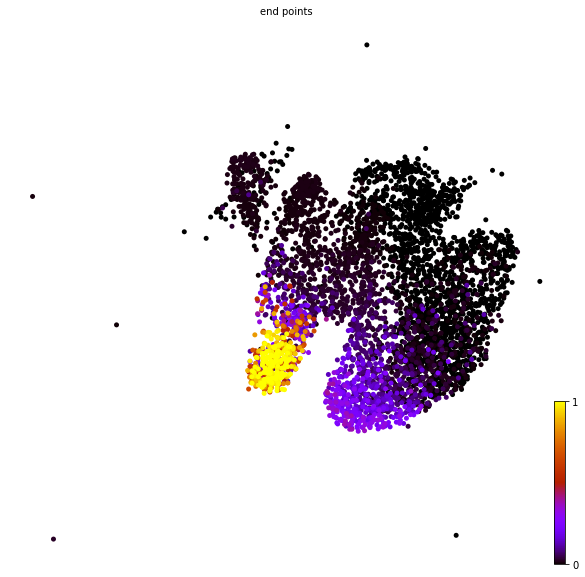

In [51]:
scv.pl.scatter(adata, color='end_points', cmap='gnuplot',
                                 figsize=(10,10),
                                 palette=palet,
                                 legend_fontsize=8,
                                 size=100,                       
                                 save='end_points.png')

In [21]:
adata.obs

,Clusters,_X,_Y,date_of_sample,date_of_plate_submission,patient_id,sanger_sample_id,sex,age,biopsy_type,...,villus__bottom_enterocytes__hvg_only,villus__top_enterocytes__hvg_only,cluster,cell_type,major_cell_type,n_counts,velocity_self_transition,root_cells,end_points,velocity_pseudotime
CCCAACTGTGGGTCAA-OTARscRNA9294496,0,21.269917,27.562302,06-08-2020,nan,06-08-2020-001,OTARscRNA9294496,M,40.0,TI,...,-0.043869,-0.022123,26,MoMac IL10RA+,Myeloid,1806.043823,0.198320,0.004866,1.000000,0.999104
TGGTGATGTTCTCGTC-5892STDY8356974,9,-26.350563,-6.619267,17-10-2019,17-10-2019,17-10-2019-002,5892STDY8356974,M,38.0,TI,...,0.859693,0.417250,26,MoMac IL10RA+,Myeloid,1724.920166,0.065761,0.104599,0.041949,0.453321
ACCTACCCATGTTACG-OTARscRNA8356110,8,-38.164818,-10.806756,22-01-2020,23-01-2020,22-01-2020-001,OTARscRNA8356110,F,51.0,TI,...,0.471936,1.484828,14,Mac resident IL10RA-,Myeloid,1165.216309,0.157233,1.000000,0.000047,0.390176
GCAACATTCGGTGTTA-OTARscRNA9294488,1,-13.020995,15.226072,22-07-2020,nan,22-07-2020-004,OTARscRNA9294488,F,30.0,TI,...,1.084325,0.410386,29,Dendritic cell,Myeloid,879.522339,0.219947,0.357637,0.000138,0.382091
TGTTGAGGTCCACATA-5892STDY8039553,1,-14.254423,-24.494484,20-09-2019,24-09-2019,20-09-2019-002,5892STDY8039553,M,36.0,TI,...,0.595594,0.319534,32,Mac resident IL10RA+,Myeloid,1624.325073,0.090400,0.007801,0.188709,0.444259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGACCTAGCCGAACA-OTARscRNA8966185,0,-34.314636,3.161969,06-03-2020,09-03-2020,06-03-2020-002,OTARscRNA8966185,F,31.0,TI,...,0.658747,0.366055,14,Mac resident IL10RA-,Myeloid,867.927490,0.174542,1.000000,0.000092,0.389472
AAGTGAATCAGCTTCC-OTARscRNA9294502,4,9.986501,24.668953,13-08-2020,nan,13-08-2020-001,OTARscRNA9294502,F,66.0,TI,...,1.206693,0.654330,32,Mac resident IL10RA+,Myeloid,1766.005615,0.081866,0.004428,0.241296,0.443595
GACCCAGCAGGTTCGC-Crohns_Disease_Collection_Study8727391,12,-14.025015,-31.277533,24-01-2020,27-01-2020,24-01-2020-001,Crohns_Disease_Collection_Study8727391,M,33.0,TI,...,0.514296,0.221917,14,Mac resident IL10RA-,Myeloid,1001.235962,0.206400,0.501581,0.000167,0.392804
TTCTGTATCCCGTAAA-5892STDY8644401,4,-35.720428,-9.947260,28-02-2020,02-03-2020,28-02-2020-003,5892STDY8644401,M,48.0,TI,...,0.338537,0.291949,14,Mac resident IL10RA-,Myeloid,1035.393066,0.158212,0.673744,0.000027,0.388766


In [9]:
from igraph import *

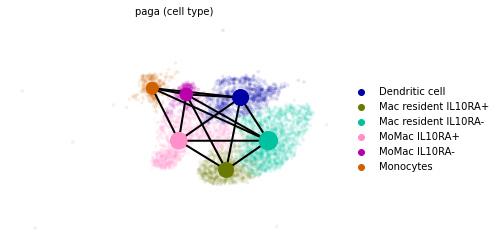

In [18]:
sc.tl.paga(adata, groups='cell_type')
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

In [188]:
#col1=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Enterocyte'].obs.cell_type))]
#col1=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Enterocyte'].obs.cell_type), col1))


#col2=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Secretory'].obs.cell_type))]
#col2=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Secretory'].obs.cell_type), col2))


#col3=palette[: len(np.unique(adata[adata.obs['major_cell_type']=='Stem cells'].obs.cell_type))]
#col3=dict(zip(np.unique(adata[adata.obs['major_cell_type']=='Stem cells'].obs.cell_type), col3))

In [16]:
def merge_dicts(*dict_args):
    result = {}
    for dictionary in dict_args:
        result.update(dictionary)
    return result

#z = merge_dicts(col1, col2, col3) 
z = merge_dicts(col1) 
z

{'Dendritic cell': '#1f77b4',
 'Mac resident IL10RA+': '#ff7f0e',
 'Mac resident IL10RA-': '#279e68',
 'MoMac IL10RA+': '#d62728',
 'MoMac IL10RA-': '#aa40fc',
 'Monocytes': '#8c564b'}

In [192]:
#df1=pd.DataFrame(adata.obsm['X_umap'], columns=['UMAP1', 'UMAP2'], index=adata.obs_names)
#p = plt9.ggplot(df1, plt9.aes(x='UMAP1', y='UMAP2'))
#p = p + plt9.geom_point(size = 0.1) 
#p

In [193]:
# Remove outlier cells on figure
df=pd.DataFrame(adata.obsm['X_umap'][:,1], index=adata.obs_names.values)
df=df.sort_values(by=[0])
outliers=df[-2:].index.values
adata_sub=adata[~adata.obs_names.isin(outliers)]

In [19]:
from matplotlib.font_manager import FontProperties
ff = FontProperties()
ff.set_family('serif')
ff.set_name('Times New Roman')
ff.set_style('italic')
ff


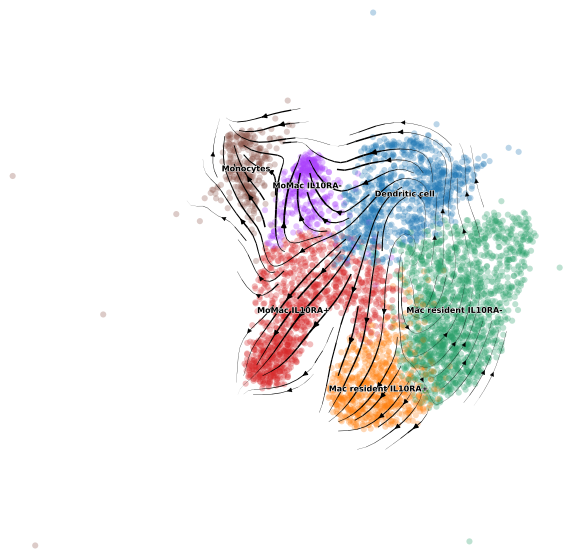

In [21]:
ax = scv.pl.velocity_embedding_stream(adata, basis='umap',
                                 title="Epithelial",
                                 color='cell_type', 
                                 legend_loc='on data',
                                 figsize=(10,10),
                                 palette=z,
                                 legend_fontsize=8,
                                 size=150,
                                 color_map=palette,
                                 #alpha=0,
                                 frameon=False,
                                 legend_fontweight='semibold',
                                 #linewidth=None,
                                         show=False)

ax.set_title("")
#ax.set_label(font=ff)

import matplotlib.pyplot as pl
fig = ax.figure 


In [23]:
fig.savefig('myeloid_velocity.png')

In [18]:

ax = scv.pl.velocity_embedding_stream(adata_sub, basis='umap',
                                 title="Epithelial",
                                 color='cell_type', 
                                 legend_loc='on data',
                                 figsize=(10,10),
                                 palette=z,
                                 legend_fontsize=8,
                                 size=150,
                                 color_map=palette,
                                 #alpha=0,
                                 frameon=False,
                                 legend_fontweight='semibold',
                                 #linewidth=None,
                                         show=False)
ax.set_title("")
#ax.set_label(font=ff)

import matplotlib.pyplot as pl
fig = ax.figure 



NameError: name 'adata_sub' is not defined

In [236]:
fig.savefig('epithelial_velocity.png')

In [40]:
#sc.pl.draw_graph(adata, color='cell_type', legend_loc='right margin')

KeyError: 'draw_graph'

In [47]:
sc.tl.paga(adata, use_rna_velocity=True, groups='cell_type')

KeyError: 'connectivities'

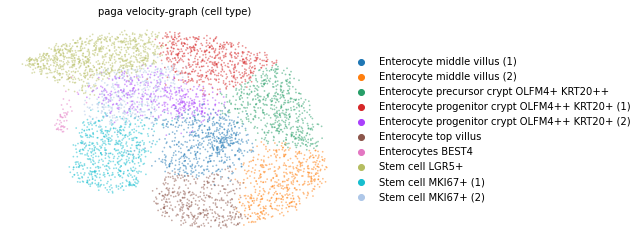

In [48]:
scv.pl.paga(adata, basis='umap', threshold=.05, frameon=False, legend_loc='right')

In [20]:
scv.tl.velocity_pseudotime(adata)

computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


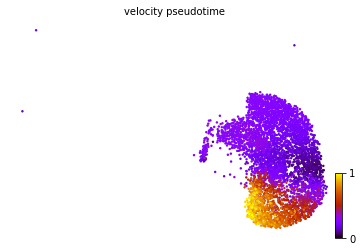

In [21]:
scv.pl.scatter(adata, color='velocity_pseudotime', cmap='gnuplot')

In [23]:
#adata.var[adata.var['Gene']=='NOD2']
crypt_axis_genes = ["CEACAM1", "ALPI", 'APOA4', 'APOC3']
crypt_axis_genes_ensemble = adata.var[adata.var['Gene'].isin(crypt_axis_genes)].index.values

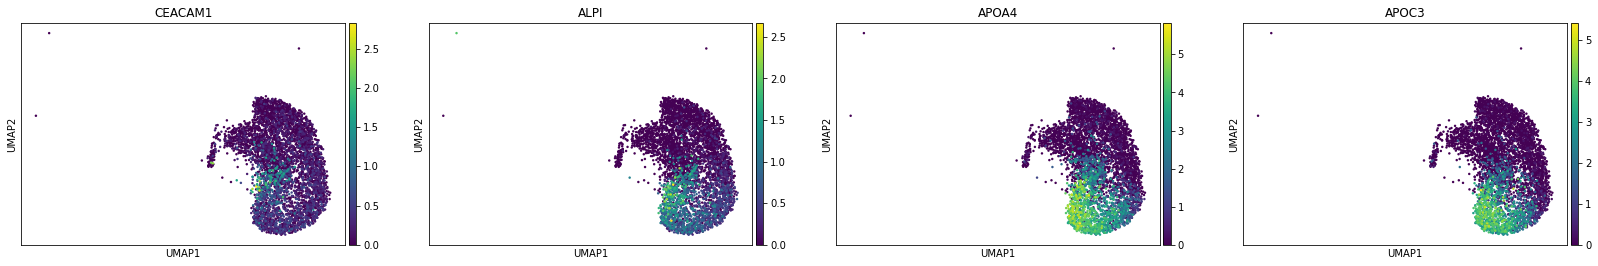

In [25]:
sc.pl.umap(adata, color=crypt_axis_genes, use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis',
           save='CLCA1.png')

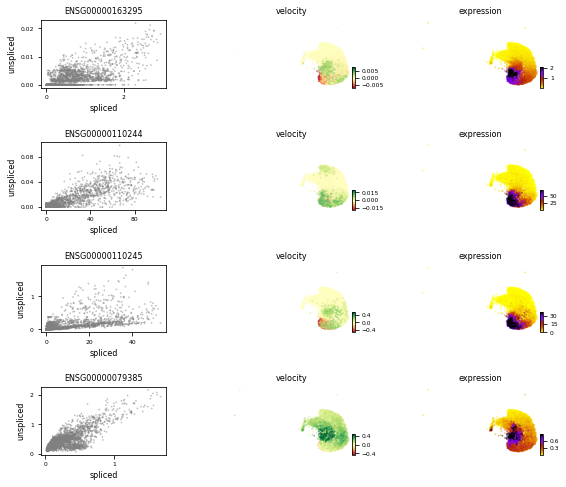

In [24]:
scv.pl.velocity(adata,  var_names=crypt_axis_genes_ensemble)

IndexError: index 0 is out of bounds for axis 0 with size 0

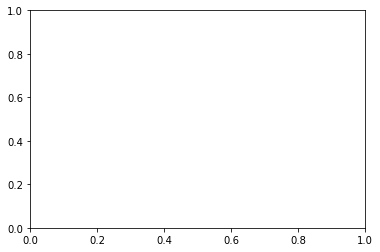

In [84]:
sc.pl.umap(adata, color=['CD45RA'], use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis')
           #save='SOX9.png')

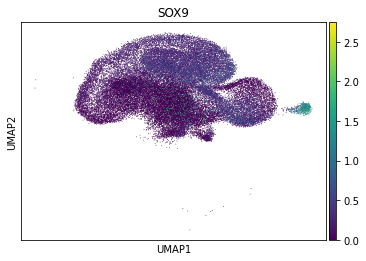

In [63]:
sc.pl.umap(adata, color=['SOX9'], use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis',
           save='SOX9.png')

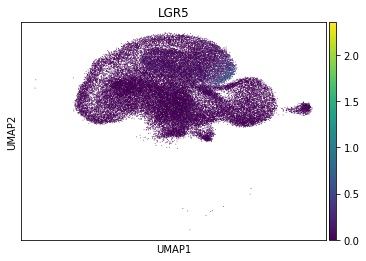

In [67]:
sc.pl.umap(adata, color=['LGR5'], use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis',
           save='LGR5.png')

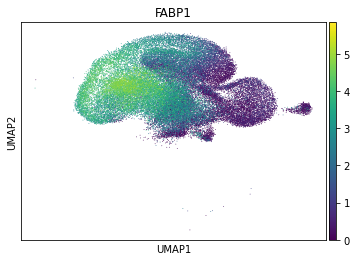

In [64]:
sc.pl.umap(adata, color=['FABP1'], use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis',
           save='FABP1.png')

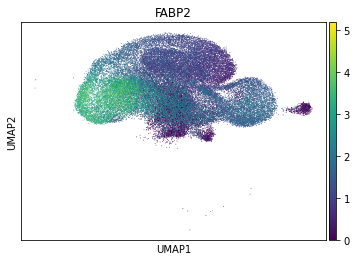

In [61]:
sc.pl.umap(adata, color=['FABP2'], use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis')

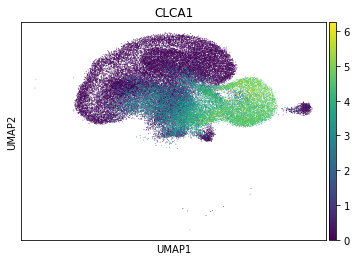

In [66]:
sc.pl.umap(adata, color=['CLCA1'], use_raw=False, 
           gene_symbols='Gene',
           color_map='viridis',
           save='CLCA1.png')

In [113]:
np.unique(adata.obs['category'])

array(['B cells', 'Mast', 'Myeloid', 'NK', 'T cells'], dtype=object)

Trying to set attribute `.uns` of view, copying.


saving figure to file ./figures/scvelo_-Myeloid.png


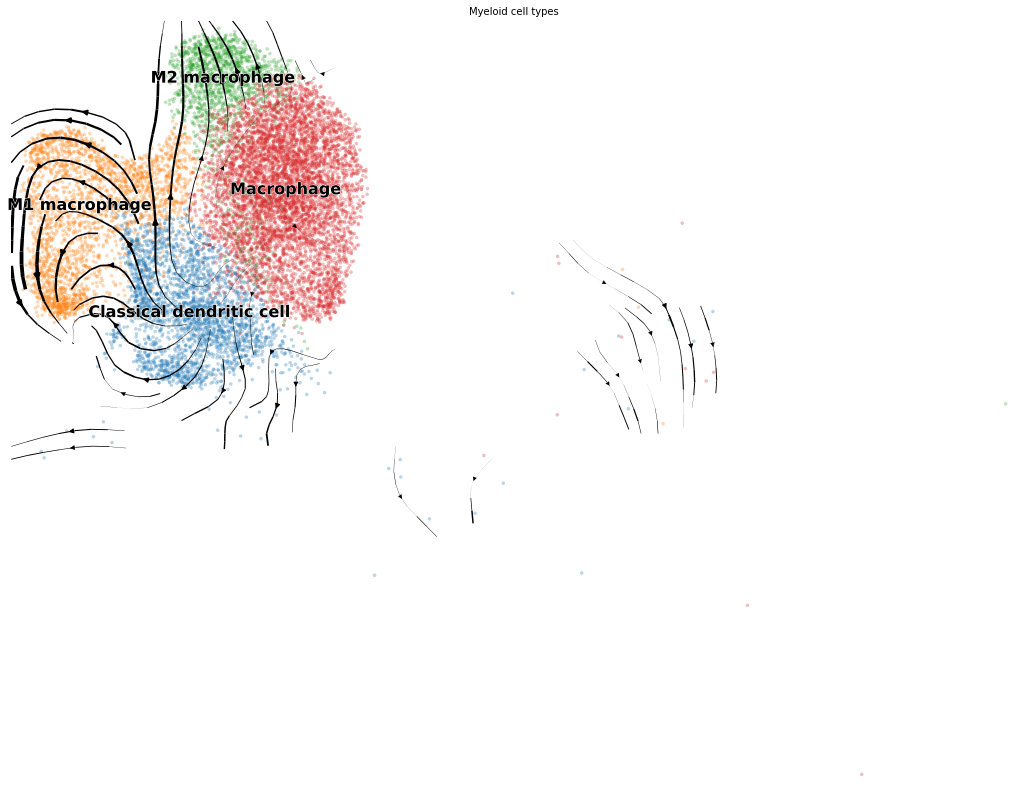

In [116]:
vv='Myeloid'
v=adata[adata.obs['category']==vv]
palette=plt.rcParams['axes.prop_cycle']
palette=palette[: len(np.unique(adata.obs['cell_type_updated']))]
scv.pl.velocity_embedding_stream(v, basis='umap',
                                 title='{} {{}}'.format(vv).format("cell types"),
                                 color='cell_type_updated', 
                                 legend_loc='on data',
                                 figsize=(18,14),
                                 palette=palette,
                                 legend_fontsize=16,
                                 size=50,
                                 color_map=None,
                                 #alpha=0,
                                 linewidth=2,
                                 frameon=False,
                                 legend_fontweight='semibold',
                                 #linewidth=None,
                                 save='-{}.png'.format(vv))

In [104]:
scv.tl.paga(v, groups='cell_type_updated')
scv.pl.paga(v, basis='umap', size=50, alpha=.1,
            figsize=(15,10),
            legend_loc='on data',
            legend_fontsize=16,
                                
                                 color_map=None,
                                 #alpha=0,
                                 linewidth=2,
                                 frameon=False,
                                 legend_fontweight='semibold',
            min_edge_width=2, node_size_scale=1.5)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:04) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:14) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


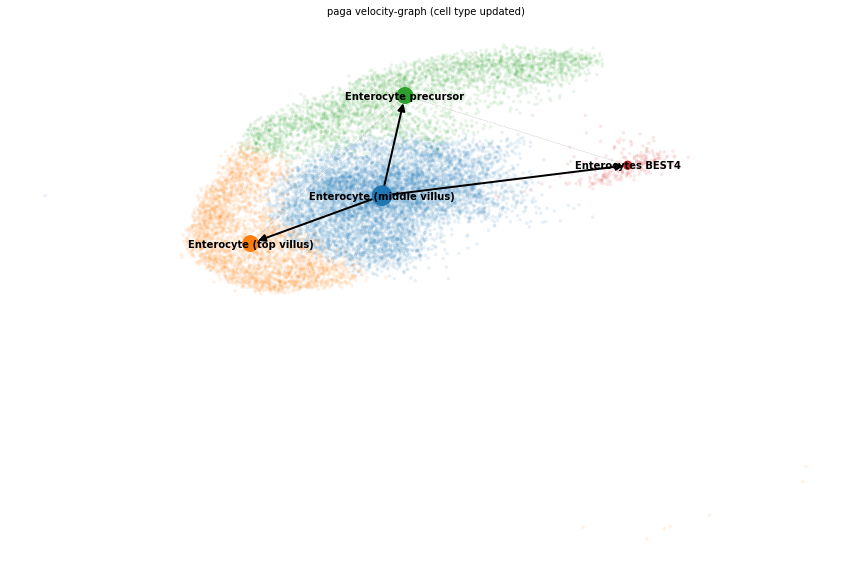

In [109]:
scv.pl.paga(v, basis='umap', size=50, alpha=.1,
            figsize=(15,10),
            legend_loc='on data',
            legend_fontsize=16,
                                
                                 color_map=None,
                                 #alpha=0,
                                 linewidth=2,
                                 frameon=False,
                                 legend_fontweight='semibold',
            min_edge_width=2, node_size_scale=1.5)

In [110]:
scv.tl.paga(adata, groups='cell_type_updated')


computing terminal states
    identified 10 regions of root cells and 1 region of end points .
    finished (0:01:05) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['velocity_pseudotime']
    finished (0:00:57) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


In [ ]:
scv.pl.paga(v, basis='umap', size=50, alpha=.1,
            figsize=(15,10),
            legend_loc='on data',
            legend_fontsize=16,
                                
                                 color_map=None,
                                 #alpha=0,
                                 linewidth=2,
                                 frameon=False,
                                 legend_fontweight='semibold',
            min_edge_width=2, node_size_scale=1.5)